In [111]:
from ipywidgets import interact
from fastai.basics import *

plt.rc('figure', dpi=90)

def plot_function(f, title=None, min=-2.1, max=2.1, color='r', ylim=None):
    x = torch.linspace(min,max, 100)[:,None]
    if ylim: plt.ylim(ylim)
    plt.plot(x, f(x), color)
    if title is not None: plt.title(title)

In [101]:
def cubic(a, b, c, d, x):
  return a*x**3 + b*x**2 + c*x + d

In [102]:
def loss_fn(a, b, c, d, x):
  return (cubic(a, b, c, d, x) - 0)**2 # We want the cubic output to be 0

In [103]:
x = torch.tensor([3.0], requires_grad=True)
x

tensor([3.], requires_grad=True)

In [104]:
#x^3 - 6x^2 + 11x - 6 = 0 ->roots are 1,2 and 3

In [105]:
learning_rate = 0.01 # Adjust this value

# Define the coefficients of the cubic function
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(-6.0, requires_grad=True)
c = torch.tensor(11.0, requires_grad=True)
d = torch.tensor(-6.0, requires_grad=True)


for i in range(10):
  # Calculate the loss
  loss = loss_fn(a, b, c, d, x)

  # Backpropagate to calculate gradients
  loss.backward()

  # Update x using SGD
  with torch.no_grad():
    x -= x.grad * learning_rate

  # Zero the gradients for the next iteration
  x.grad.zero_()

  print(f"Iteration {i+1}, Loss: {loss.item()}, x: {x.item()}")

Iteration 1, Loss: 0.0, x: 3.0
Iteration 2, Loss: 0.0, x: 3.0
Iteration 3, Loss: 0.0, x: 3.0
Iteration 4, Loss: 0.0, x: 3.0
Iteration 5, Loss: 0.0, x: 3.0
Iteration 6, Loss: 0.0, x: 3.0
Iteration 7, Loss: 0.0, x: 3.0
Iteration 8, Loss: 0.0, x: 3.0
Iteration 9, Loss: 0.0, x: 3.0
Iteration 10, Loss: 0.0, x: 3.0


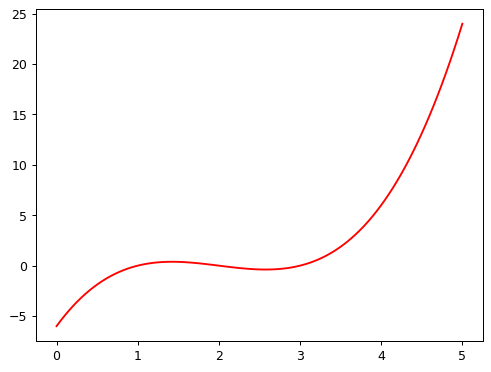

In [113]:
def cubic_expression(x):
  return x**3 - 6*x**2 + 11*x - 6

# Plot the function
plot_function(cubic_expression, min=0, max=5)

In [114]:
#Let's test
cubic_expression(3.0)

0.0